First 5 rows of the dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Data types of each feature:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Histograms of each feature:


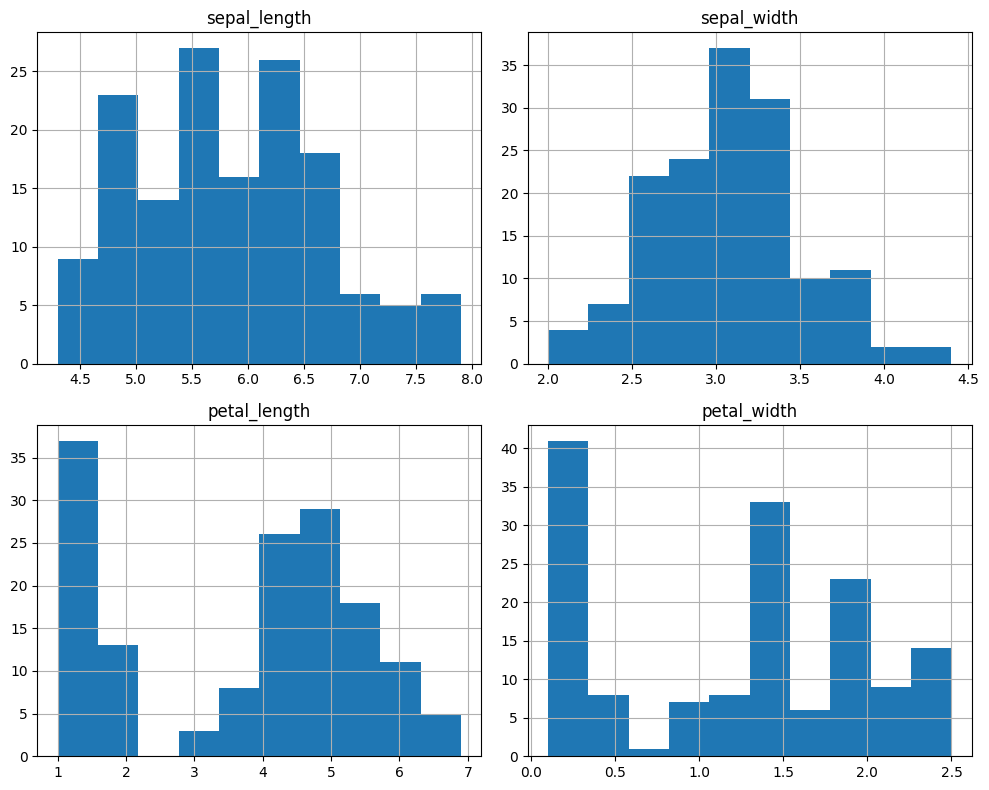


Boxplots of all features:


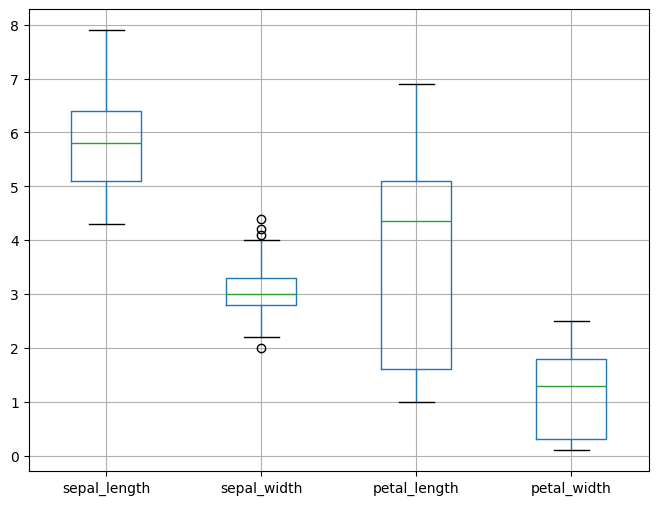


Statistical analysis of sepal_width:
Mean of the dataset is 3.0573333333333332
Standard deviation is 0.4344109677354946

Outliers detected using Z-score method (z>1): [3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.6, 3.6, 3.6, 3.6, 3.7, 3.7, 3.7, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.9, 3.9, 4.0, 4.1, 4.2, 4.4]

Q1 (25th percentile): 2.8
Q3 (75th percentile): 3.3
Interquartile range is 0.5
Lower limit is 2.05
Upper limit is 4.05

Outliers detected using IQR method: [2.0, 4.1, 4.2, 4.4]

Boxplots by species for each feature:


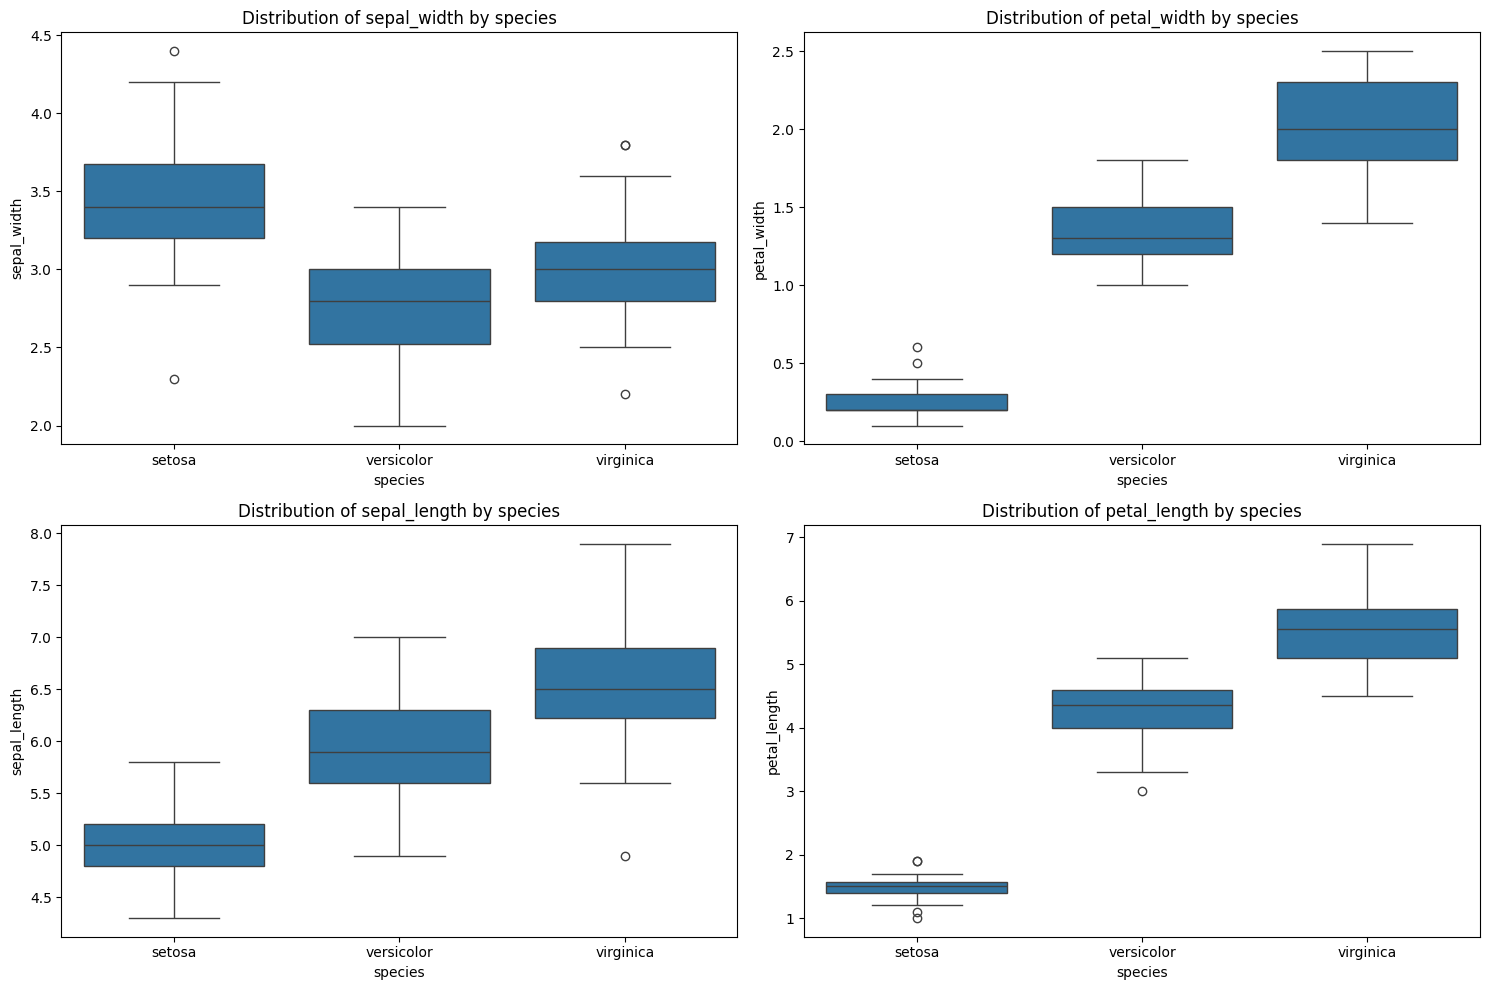


Scatter plots by species for each feature:


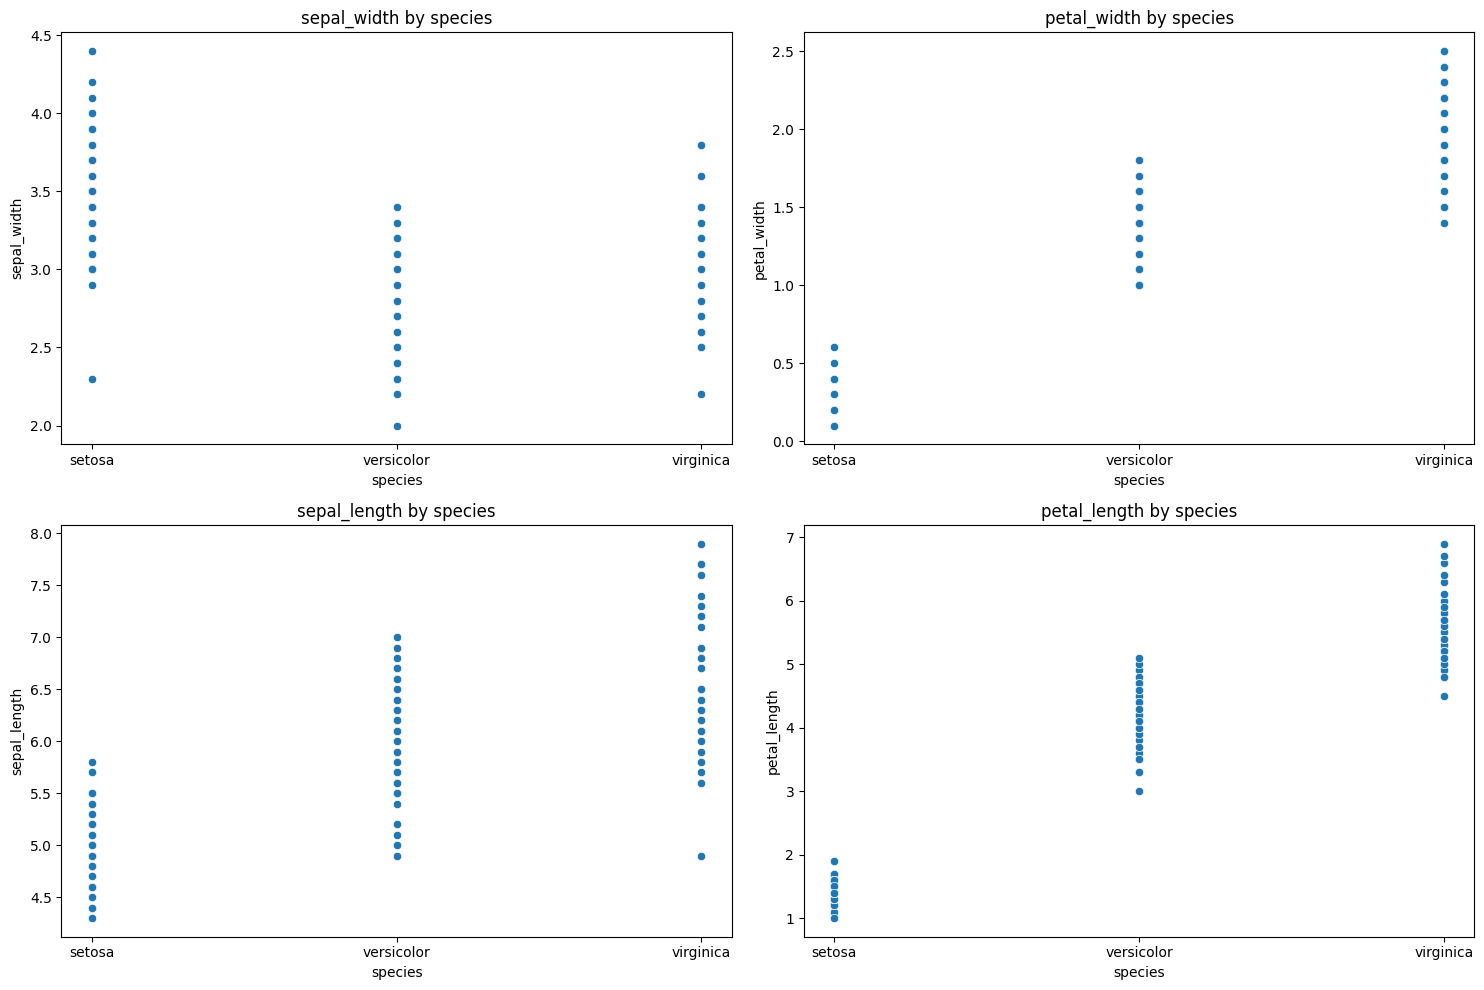

In [1]:
# Practical-10: Data Analysis with Iris Dataset
# March 11, 2024

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
df = sns.load_dataset('iris')

# Display first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Display data types
print("\nData types of each feature:")
print(df.dtypes)

# 1. Histograms for each feature
print("\nHistograms of each feature:")
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

# 2. Boxplots for all features
print("\nBoxplots of all features:")
df.boxplot(figsize=(8,6))
plt.show()

# 3. Statistical analysis of sepal_width
print("\nStatistical analysis of sepal_width:")
sort_data = np.sort(df['sepal_width'])
mean = np.mean(sort_data)
std = np.std(sort_data)
print('Mean of the dataset is', mean)
print('Standard deviation is', std)

# Z-score method for outlier detection
threshold = 1
outlier_z = []
for i in sort_data:
    z = (i-mean)/std
    if z > threshold:
        outlier_z.append(i)
print('\nOutliers detected using Z-score method (z>1):', outlier_z)

# IQR method for outlier detection
Q1 = np.percentile(sort_data, 25, method='midpoint')
Q3 = np.percentile(sort_data, 75, method='midpoint')
print('\nQ1 (25th percentile):', Q1)
print('Q3 (75th percentile):', Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('Lower limit is', low_lim)
print('Upper limit is', up_lim)

outlier_iqr = []
for x in sort_data:
    if ((x > up_lim) or (x < low_lim)):
        outlier_iqr.append(x)
print('\nOutliers detected using IQR method:', outlier_iqr)

# 4. Boxplots by species for each feature
print("\nBoxplots by species for each feature:")
features = ['sepal_width', 'petal_width', 'sepal_length', 'petal_length']

plt.figure(figsize=(15,10))
for i, feature in enumerate(features, 1):
    plt.subplot(2,2,i)
    sns.boxplot(data=df, x="species", y=feature)
    plt.title(f'Distribution of {feature} by species')
plt.tight_layout()
plt.show()

# 5. Scatter plots by species for each feature
print("\nScatter plots by species for each feature:")
plt.figure(figsize=(15,10))
for i, feature in enumerate(features, 1):
    plt.subplot(2,2,i)
    sns.scatterplot(data=df, x="species", y=feature)
    plt.title(f'{feature} by species')
plt.tight_layout()
plt.show()